In [2]:
import h5py
import sys
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import make_smoothing_spline, make_splrep, interp1d, BSpline

In [3]:
import importlib
import tools
importlib.reload(tools)
from tools import bin_data  


data = np.load('/sdf/data/neutrino/summer25/seohyeon/gampix_estimators/muon1k_0-1gev_estimators_gampix_cleaned.npz')
print(data.keys())

energies = data['energies']
naive = data['naive']
detailed = data['detailed']
charge = data['charge']
evs = data['evs']

outlier = 18272

energies = np.delete(energies, outlier)
naive = np.delete(naive, outlier)
detailed = np.delete(detailed, outlier)
charge = np.delete(charge, outlier)
evs = np.delete(evs, outlier)

KeysView(NpzFile '/sdf/data/neutrino/summer25/seohyeon/gampix_estimators/muon1k_0-1gev_estimators_gampix_cleaned.npz' with keys: energies, naive, detailed, charge, evs)


In [4]:
splines = np.load('/sdf/data/neutrino/summer25/seohyeon/efxns/efxns_54k_gampix.npz')

naive_spl = BSpline(splines['naive_t'], splines['naive_c'], splines['naive_k'])
detailed_spl = BSpline(splines['detailed_t'], splines['detailed_c'], splines['detailed_k'])



def signed_log(val):
    return np.sign(val) * np.log1p(np.abs(val))  # log1p(val) = log(1 + val)


In [5]:
naive_res = naive_spl(naive) - energies
naive_rres = naive_res / energies

detailed_res = detailed_spl(detailed) - energies
detailed_rres = detailed_res / energies

print(len(naive_rres))
total_evs = '~34k'

34441


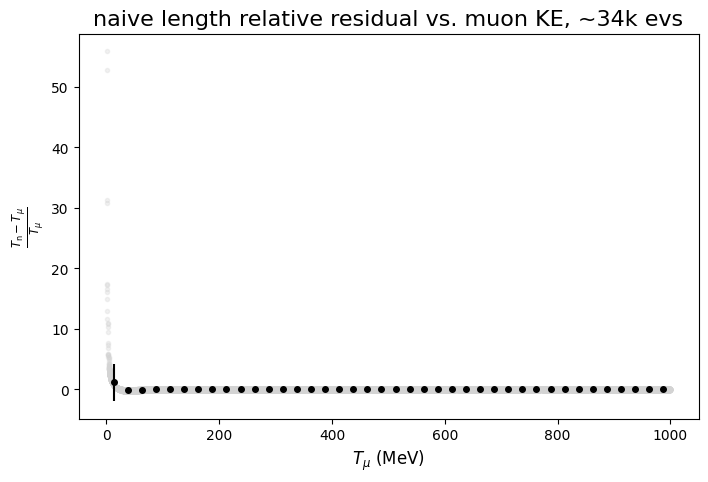

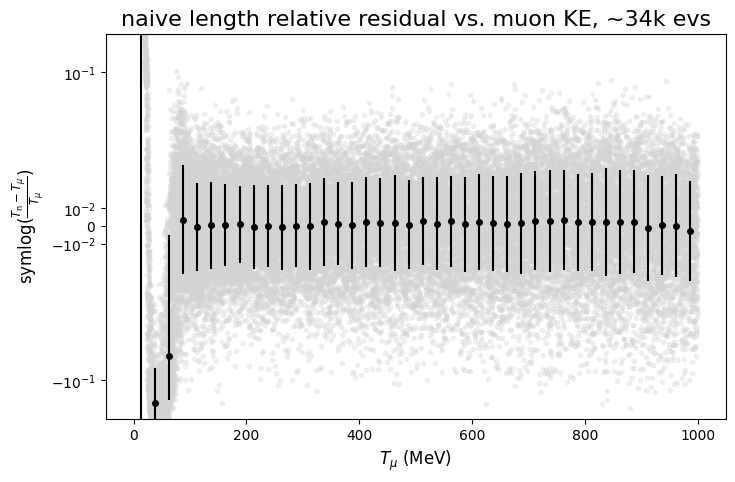

In [11]:
naive_rres_x, naive_rres_y, naive_rres_error, naive_rres_rrms = bin_data(energies, naive_rres, 40)

# plot of all data and binned data with no log scale
plt.figure(figsize=(8, 5))
plt.plot(energies, naive_rres, 'o', ms=3, color='lightgray', alpha=0.3)
plt.errorbar(naive_rres_x, naive_rres_y, naive_rres_error, fmt='o', color='black', ms=4)
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'$\frac{T_\text{n} - T_\mu}{T_\mu}$', fontsize=12)
plt.title(f'naive length relative residual vs. muon KE, {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy/naive_rres_{total_evs}evs.png')


# plot of all data and binned data on log scale 
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_yscale('symlog', linthresh=0.08)
plt.ylim(-0.2, 0.2)
plt.plot(energies, naive_rres, 'o', ms=3, color='lightgray', alpha=0.3)
plt.errorbar(naive_rres_x, naive_rres_y, naive_rres_error, fmt='o', color='black', ms=4)
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'symlog($\frac{T_\text{n} - T_\mu}{T_\mu}$)', fontsize=12)
plt.title(f'naive length relative residual vs. muon KE, {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy/naive_rres_log_{total_evs}evs.png')

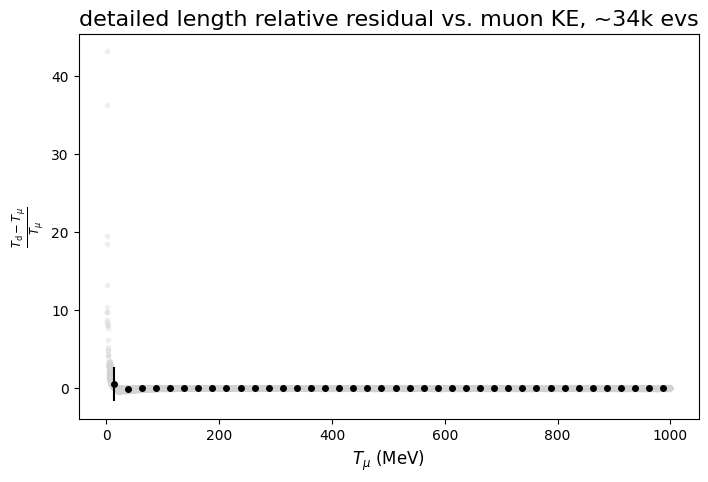

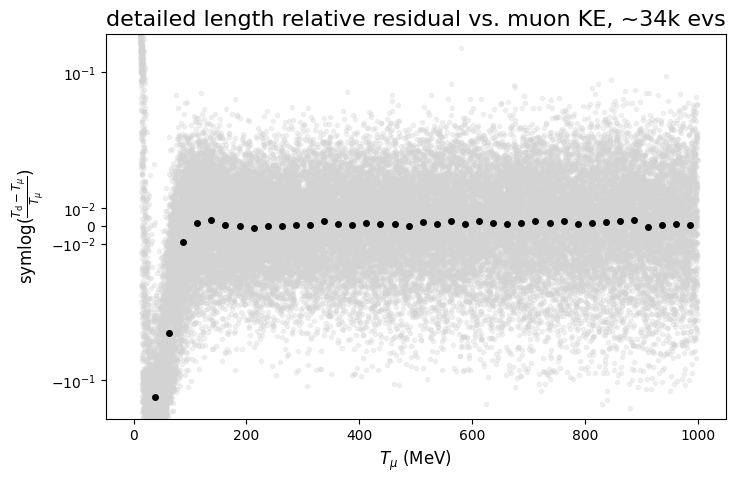

In [11]:
detailed_rres_x, detailed_rres_y, detailed_rres_error, detailed_rres_rrms = bin_data(energies, detailed_rres, 40)

# plot of all data and binned data with no log scale
plt.figure(figsize=(8, 5))
plt.plot(energies, detailed_rres, 'o', ms=3, color='lightgray', alpha=0.3)
plt.errorbar(detailed_rres_x, detailed_rres_y, detailed_rres_error, fmt='o', color='black', ms=4)
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'$\frac{T_\text{d} - T_\mu}{T_\mu}$', fontsize=12)
plt.title(f'detailed length relative residual vs. muon KE, {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy/detailed_rres_{total_evs}evs.png')


# plot of all data and binned data on log scale 
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_yscale('symlog', linthresh=0.08)
plt.ylim(-0.2, 0.2)
plt.plot(energies, detailed_rres, 'o', ms=3, color='lightgray', alpha=0.3)
plt.plot(detailed_rres_x, detailed_rres_y, 'o', color='black', ms=4)
# plt.errorbar(detailed_rres_x, detailed_rres_y, detailed_rres_error, fmt='o', color='black', ms=4)
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'symlog($\frac{T_\text{d} - T_\mu}{T_\mu}$)', fontsize=12)
plt.title(f'detailed length relative residual vs. muon KE, {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy/detailed_rres_log_{total_evs}evs.png')

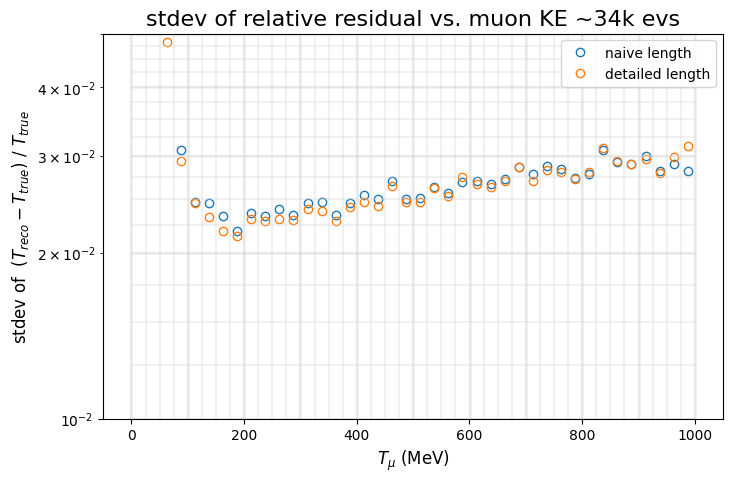

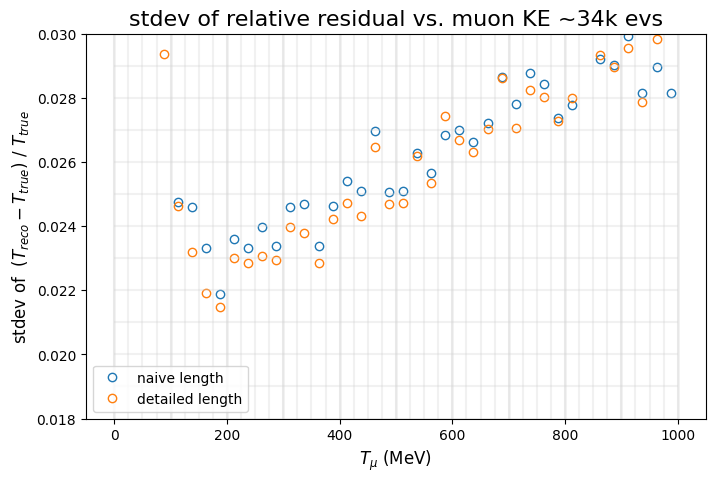

In [15]:
# comparisons ---------------
vlines_main = np.linspace(min(energies), max(energies), 11)
vlines_fine = np.linspace(min(energies), max(energies), 41)
hlines_main = np.linspace(0.01, 0.05, 5)
hlines_fine = np.linspace(0.01, 0.05, 17)

plt.figure(figsize=(8, 5))
plt.ylim(0.01, 0.05)
plt.yscale('log')
plt.plot(naive_rres_x, naive_rres_error, 'o', label="naive length", markerfacecolor='none')
plt.plot(detailed_rres_x, detailed_rres_error, 'o', label='detailed length', markerfacecolor='none')
plt.vlines(x=vlines_main, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=2)
plt.vlines(x=vlines_fine, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=1.5)
plt.hlines(y=hlines_main, xmin=0, xmax=1000, color='lightgray', alpha=0.3, linewidth=2)
plt.hlines(y=hlines_fine, xmin=0, xmax=1000, color='lightgray', alpha=0.3, linewidth=1.5)
plt.legend()
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'stdev of $\ (T_{reco} - T_{true}) \ / \ T_{true}$', fontsize=12)
plt.title(f'stdev of relative residual vs. muon KE {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy/rres_rms_comparison_logzoom_{total_evs}evs.png')


hlines2 = np.linspace(0.018, 0.03, 13)
plt.figure(figsize=(8, 5))
plt.ylim(0.018, 0.03)
plt.plot(naive_rres_x, naive_rres_error, 'o', label="naive length", markerfacecolor='none')
plt.plot(detailed_rres_x, detailed_rres_error, 'o', label='detailed length', markerfacecolor='none')
plt.vlines(x=vlines_main, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=2)
plt.vlines(x=vlines_fine, ymin=0, ymax=1.5, color='lightgray', alpha=0.3, linewidth=1.5)
plt.hlines(y=hlines2, xmin=0, xmax=1000, color='lightgray', alpha=0.3)
plt.legend()
plt.xlabel(r'$T_\mu$ (MeV)', fontsize=12)
plt.ylabel(r'stdev of $\ (T_{reco} - T_{true}) \ / \ T_{true}$', fontsize=12)
plt.title(f'stdev of relative residual vs. muon KE {total_evs} evs', fontsize=16)
plt.savefig(f'plots/accuracy/rres_rms_comparison_linearzoom_{total_evs}evs.png')